Flight delays can be caused by a variety of factors, including weather, air traffic control issues, and mechanical problems. <br>Understanding these factors is crucial for developing strategies to mitigate delays and improve overall efficiency in air travel.

Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

Read the dataset:

In [2]:
df = pd.read_csv('./flight_data_2024_sample.csv')

Explore the dataset:

In [3]:
df.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,4,18,4,2024-04-18,MQ,3535.0,DFW,"Dallas/Fort Worth, TX",Texas,...,0,151.0,144.0,119.0,835.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,AA,148.0,CLT,"Charlotte, NC",North Carolina,...,0,286.0,273.0,253.0,1773.0,0,0,0,0,0
2,2024,12,12,4,2024-12-12,9E,5440.0,CHA,"Chattanooga, TN",Tennessee,...,0,59.0,50.0,29.0,106.0,0,0,0,0,0
3,2024,4,8,1,2024-04-08,WN,1971.0,OMA,"Omaha, NE",Nebraska,...,0,180.0,177.0,163.0,1099.0,0,0,0,0,0
4,2024,2,16,5,2024-02-16,WN,862.0,BWI,"Baltimore, MD",Maryland,...,0,90.0,96.0,76.0,399.0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 10000 non-null  int64  
 1   month                10000 non-null  int64  
 2   day_of_month         10000 non-null  int64  
 3   day_of_week          10000 non-null  int64  
 4   fl_date              10000 non-null  object 
 5   op_unique_carrier    10000 non-null  object 
 6   op_carrier_fl_num    10000 non-null  float64
 7   origin               10000 non-null  object 
 8   origin_city_name     10000 non-null  object 
 9   origin_state_nm      10000 non-null  object 
 10  dest                 10000 non-null  object 
 11  dest_city_name       10000 non-null  object 
 12  dest_state_nm        10000 non-null  object 
 13  crs_dep_time         10000 non-null  int64  
 14  dep_time             9884 non-null   float64
 15  dep_delay            9884 non-null   

In [5]:
df.isnull().sum()

year                      0
month                     0
day_of_month              0
day_of_week               0
fl_date                   0
op_unique_carrier         0
op_carrier_fl_num         0
origin                    0
origin_city_name          0
origin_state_nm           0
dest                      0
dest_city_name            0
dest_state_nm             0
crs_dep_time              0
dep_time                116
dep_delay               116
taxi_out                120
wheels_off              120
wheels_on               127
taxi_in                 127
crs_arr_time              0
arr_time                127
arr_delay               164
cancelled                 0
cancellation_code      9878
diverted                  0
crs_elapsed_time          0
actual_elapsed_time     164
air_time                164
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
dtype: int64

Drop the nulls from the dataset:

In [6]:
df_cleaned = df.fillna(0)


In [7]:
df_cleaned.isnull().sum()

year                   0
month                  0
day_of_month           0
day_of_week            0
fl_date                0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
origin_state_nm        0
dest                   0
dest_city_name         0
dest_state_nm          0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [8]:
df_cleaned.shape

(10000, 35)

# First Hypothesis
H₀ (Null Hypothesis): There is no significant difference in mean flight arrival delays between weekdays and weekends.

H₁ (Alternative Hypothesis): Mean flight arrival delays are significantly higher on weekends compared to weekdays.

Find the mean of the 'ARRIVAL_DELAY' by day of the week in minutes:

In [9]:
df_delayed_mean = df_cleaned.groupby('day_of_week')['arr_delay'].mean().reset_index()
print(df_delayed_mean)

   day_of_week  arr_delay
0            1   6.320051
1            2   3.039286
2            3   4.560182
3            4   8.710696
4            5   9.820671
5            6   9.410769
6            7   9.928369


# ANOVA (Analysis of Variance)
Purpose:
ANOVA tests whether the means of several groups are equal.

Null hypothesis (H₀): The mean arrival delay is the same across all days of the week.

Alternative hypothesis (H₁): At least one day has a different mean arrival delay.

In [12]:
# Group delays by day
groups = [df_cleaned[df_cleaned['day_of_week'] == day]['arr_delay'] for day in sorted(df_cleaned['day_of_week'].unique())]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: At least one day's mean delay is significantly different.")
else:
    print("Fail to reject H₀: No significant difference in mean delays across days.")

ANOVA F-statistic: 3.518, p-value: 0.002
Reject H₀: At least one day's mean delay is significantly different.


p-value < 0.05, therefore we reject H₀: at least one group mean is significantly different.

# t-test
Purpose:
A t-test compares the means of two groups. Example: Compare mean delays for weekdays vs. weekends.

In [ ]:
# Define weekdays (1-5) and weekends (6-7)
weekdays = df_cleaned[df_cleaned['day_of_week'].isin([1,2,3,4,5])]['arr_delay']
weekends = df_cleaned[df_cleaned['day_of_week'].isin([6,7])]['arr_delay']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(weekdays, weekends, equal_var=False) 
# equal_var: If False, Welch's t-test is performed, which does not assume equal population variance.

print(f"t-test statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: Mean delays are significantly different between weekdays and weekends.")
else:
    print("Fail to reject H₀: No significant difference in mean delays between weekdays and weekends.")

t-test statistic: -2.373, p-value: 0.018
Reject H₀: Mean delays are significantly different between weekdays and weekends.


p-value < 0.05, therefore we reject H₀: there is a significant difference in mean delays between weekdays and weekends.

## Key Points on Interpreting Results
ANOVA tells you if any group is different; t-test tells you if two specific groups are different.

p-value: The probability that observed differences are due to chance.

Threshold (α): Commonly 0.05.

Reject H₀: If p-value < α, the difference is statistically significant.

Fail to Reject H₀: If p-value ≥ α, you don’t have enough evidence for a difference.

# Visualize the results:

### Boxplot plot: Identify outliers and compare the spread.

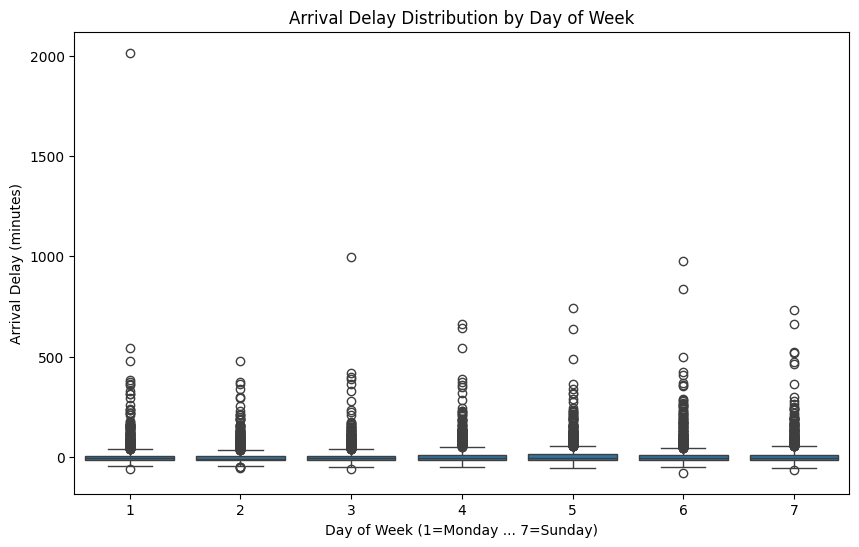

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='arr_delay', data=df_cleaned)
plt.xlabel('Day of Week (1=Monday ... 7=Sunday)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay Distribution by Day of Week')
plt.show()

### Bar plot: Spot trends, peaks, and dips.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\297455413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='arr_delay', data=mean_delays, palette='viridis')


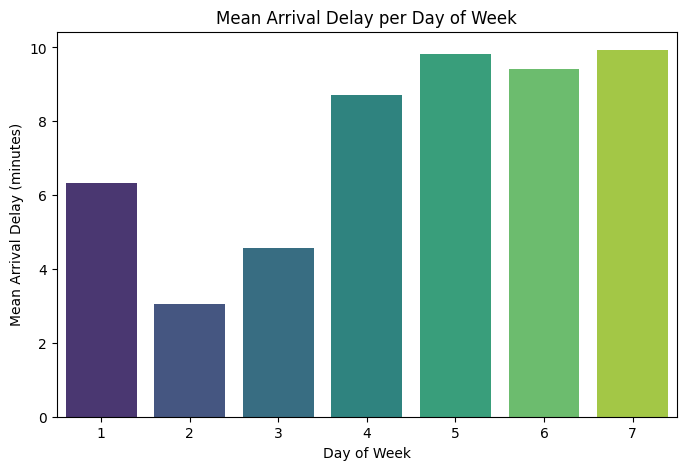

In [15]:
mean_delays = df_cleaned.groupby('day_of_week')['arr_delay'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='arr_delay', data=mean_delays, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay per Day of Week')
plt.show()

### Histogram: See overall variability and skewness.

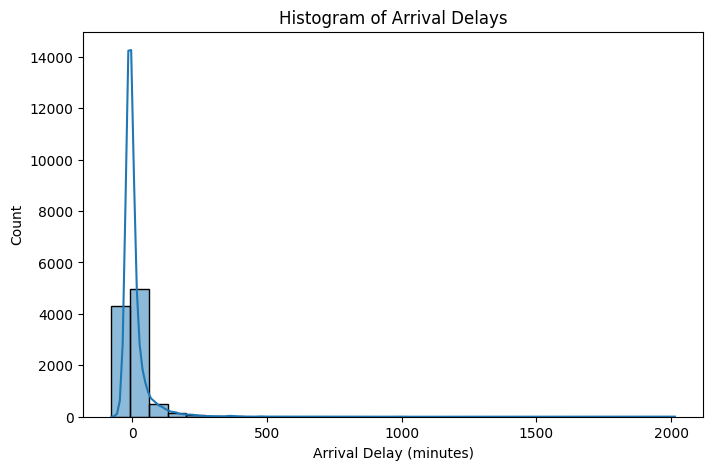

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['arr_delay'], bins=30, kde=True)
plt.xlabel('Arrival Delay (minutes)')
plt.title('Histogram of Arrival Delays')
plt.show()

Conclusion:
Based on the ANOVA and t-test results, we found significant differences in flight arrival delays across days of the week and between weekdays and weekends. This suggests that certain days may be more prone to delays, which could inform scheduling and operational decisions.

# Second Hypothesis
H₀ (Null Hypothesis): There is no significant difference in mean flight arrival delays between months with school breaks and months without.

H₁ (Alternative Hypothesis): There is a significant difference in mean flight arrival delays between months with school breaks and months without.

Find the mean of the 'ARRIVAL_DELAY' by month in minutes:

In [20]:
df_delayed_month_mean = df_cleaned.groupby('month')['arr_delay'].mean().reset_index()
print(df_delayed_month_mean)

    month  arr_delay
0       1   9.975806
1       2  -0.329609
2       3   7.849282
3       4   6.496495
4       5  12.690276
5       6  11.312426
6       7  20.673937
7       8   9.878893
8       9   0.929426
9      10  -3.569767
10     11   1.988722
11     12  10.253102


Filter the dataset for months with and without school breaks:

In [17]:
school_break_months = [6, 7, 12]
non_break_months = [m for m in range(1, 13) if m not in school_break_months]

break_delays = df_cleaned[df_cleaned['month'].isin(school_break_months)]['arr_delay']
non_break_delays = df_cleaned[df_cleaned['month'].isin(non_break_months)]['arr_delay']

### ANOVA (Analysis of Variance)

In [19]:
groups = [df_cleaned[df_cleaned['month'] == m]['arr_delay'] for m in sorted(df_cleaned['month'].unique())]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: At least one month's mean delay is significantly different.")
else:
    print("Fail to reject H₀: No significant difference in mean delays across months.")

ANOVA F-statistic: 12.941, p-value: 0.000
Reject H₀: At least one month's mean delay is significantly different.


### t-test

In [18]:
t_stat, p_value = ttest_ind(break_delays, non_break_delays, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject H₀: Mean arrival delays are significantly different between school break and non-break months.")
else:
    print("Fail to reject H₀: No significant difference in mean arrival delays between the groups.")

T-statistic: 6.023, p-value: 0.000
Reject H₀: Mean arrival delays are significantly different between school break and non-break months.


# Visualization of the results:

### Boxplot plot: Identify outliers and compare the spread.

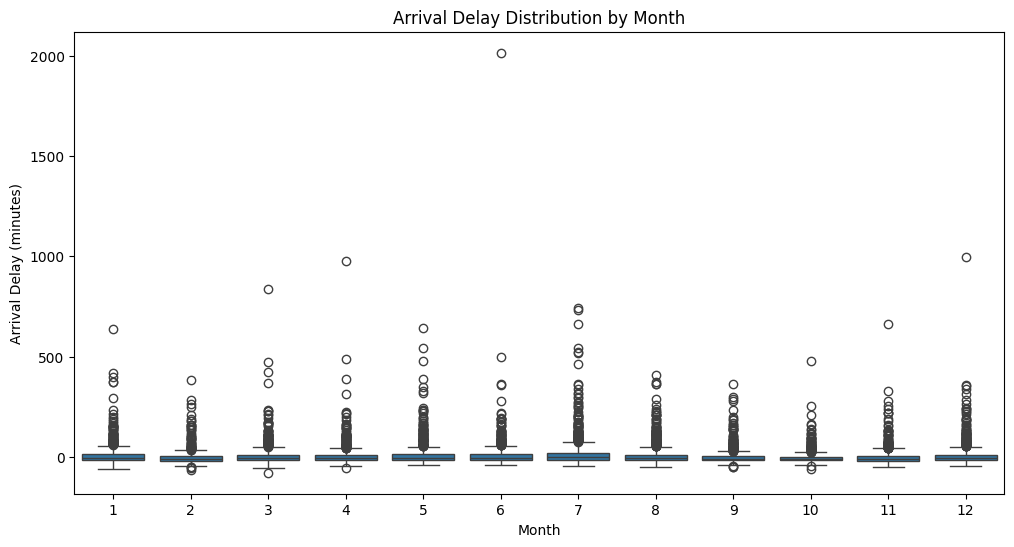

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='arr_delay', data=df_cleaned)
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay Distribution by Month')
plt.show()

### Bar plot: Spot trends, peaks, and dips.

C:\Users\bruno\AppData\Local\Temp\ipykernel_30484\2832559093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='arr_delay', data=mean_delays_month, palette='coolwarm')


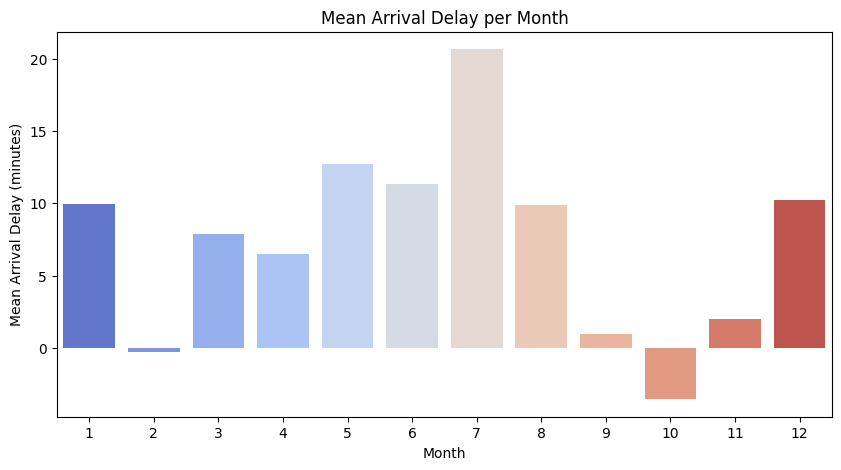

In [22]:
mean_delays_month = df_cleaned.groupby('month')['arr_delay'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='arr_delay', data=mean_delays_month, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay per Month')
plt.show()

Conclusion:
Based on the t-test results, we found a significant difference in mean flight arrival delays between months with school breaks and those without. This indicates that school breaks may influence flight delays, potentially due to increased travel demand during these periods. Further analysis could help in understanding the underlying causes and in developing strategies to manage delays during peak travel times.